In [176]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# def flatten_list(lists):
#     return functools.reduce(operator.iconcat, lists, [])

# def counter_sort(counter):
#     return sorted(counter.items(), key=lambda item: item[1], reverse=True)

# import time
# start_time = time.time()
# main()
# print("--- %s seconds ---" % (time.time() - start_time))

In [177]:
df = pd.read_csv('data/Final_normalized_price.csv', parse_dates=['Date(UTC)'], index_col='Date(UTC)')
# df
# df.describe()
# df.corr()
df.head()
df.tail()

,Price,MarketCap,Supply,TxGrowth,AddressCount,BlockSize,BlockTime,AvgGasPrice,GasUsed,NetworkHash,TransactionFee,NetworkUtilization,BlockReward
Date(UTC),,,,,,,,,,,,,
2015-08-07,2.77,0.001248,0.000000,0.000535,0.000000,0.000260,0.215844,0.641000,0.000171,0.000000,0.005430,0.133768,0.652755
2015-08-08,0.81,0.000193,0.000736,0.001151,0.000005,0.000868,0.203789,0.338000,0.005505,0.000032,0.010700,0.045934,0.672025
2015-08-09,0.74,0.000156,0.001452,0.000000,0.000008,0.000000,0.227899,0.502000,0.000000,0.000049,0.001470,0.000000,0.642873
2015-08-10,0.68,0.000123,0.002185,0.000525,0.000015,0.000226,0.203789,0.444000,0.000575,0.000086,0.004380,0.002173,0.667221
2015-08-11,1.06,0.000328,0.002924,0.002695,0.000036,0.001285,0.199770,0.075642,0.002035,0.000133,0.000991,0.007759,0.675240


,Price,MarketCap,Supply,TxGrowth,AddressCount,BlockSize,BlockTime,AvgGasPrice,GasUsed,NetworkHash,TransactionFee,NetworkUtilization,BlockReward
Date(UTC),,,,,,,,,,,,,
2020-03-20,133.40,0.109228,0.998558,0.608670,0.993622,0.459463,0.019518,0.009696,0.914582,0.588065,0.1230,0.903683,0.125918
2020-03-21,132.72,0.108684,0.998922,0.634880,0.995825,0.450679,0.013777,0.005464,0.882524,0.608523,0.0874,0.870991,0.132681
2020-03-22,122.44,0.100259,0.999278,0.552341,0.997188,0.433718,0.036165,0.006030,0.838944,0.578340,0.0845,0.849369,0.122077
2020-03-23,136.74,0.112011,0.999642,0.593157,0.998820,0.430679,0.011481,0.007664,0.847971,0.591897,0.0999,0.841817,0.134314
2020-03-24,136.77,0.112050,1.000000,0.586233,1.000000,0.442398,0.026980,0.006829,0.843460,0.601344,0.0949,0.851024,0.125125


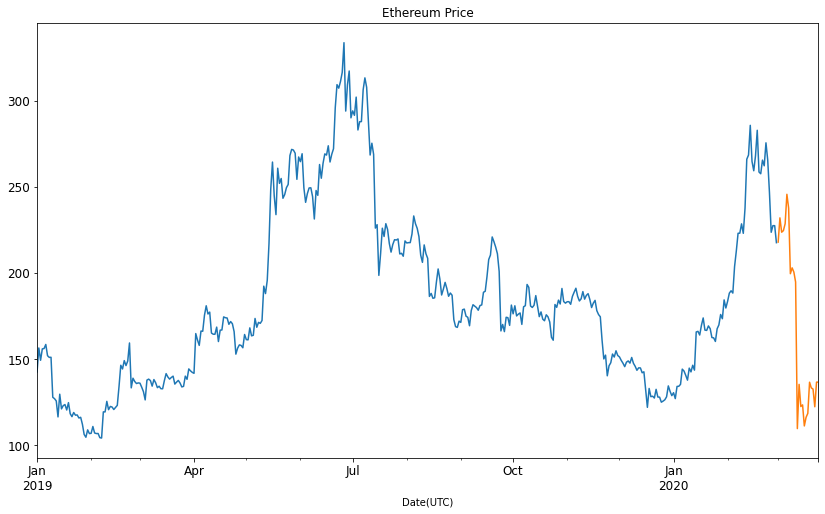

In [178]:
train = df.loc['2019-01-01':'2020-02-29']
test = df.loc['2020-03-01':]
train.Price.plot(figsize=(14, 8), title='Ethereum Price', fontsize=12)
test.Price.plot(figsize=(14, 8), title='Ethereum Price', fontsize=12)
plt.show();

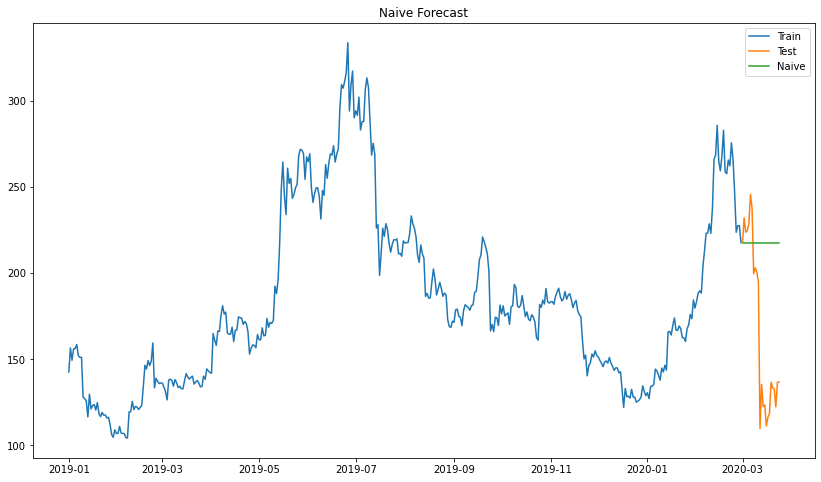

In [7]:
naive = test.copy()
naive['Naive'] = np.asarray(train['Price'])[-1]
plt.figure(figsize=(14, 8))
plt.plot(train.index, train['Price'], label='Train')
plt.plot(test.index, test['Price'], label='Val')
plt.plot(naive.index, naive['Naive'], label='Naive')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show();

In [8]:
def measure_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))
    me = np.mean(forecast - actual)
    mae = np.mean(np.abs(forecast - actual))
    mpe = np.mean((forecast - actual) / actual)
    rmse = np.mean((forecast - actual) ** 2) ** 0.5
    corr = np.corrcoef(forecast, actual)[0, 1]
    res = {'rmse' : rmse, 
           'mape' : mape, 
           'mae' : mae,
           'mpe' : mpe, 
           'me' : me,
           'corr' : corr}
    return res

In [9]:
measure_accuracy(test.Price, naive.Naive)

{'rmse': 68.8360043872391,
 'mape': 0.25898490138429503,
 'mae': 56.37583333333333,
 'mpe': -0.22566381844909963,
 'me': -49.1225,
 'corr': -1.7190576754444254e-16}

In [10]:
def get_ma(array, N, n):
    temp = array.copy()
    res = [sum(temp) / N]
    if n == 1: return res
    del temp[0]
    temp.append(res[-1])
    return res + get_ma(temp, N, n - 1)

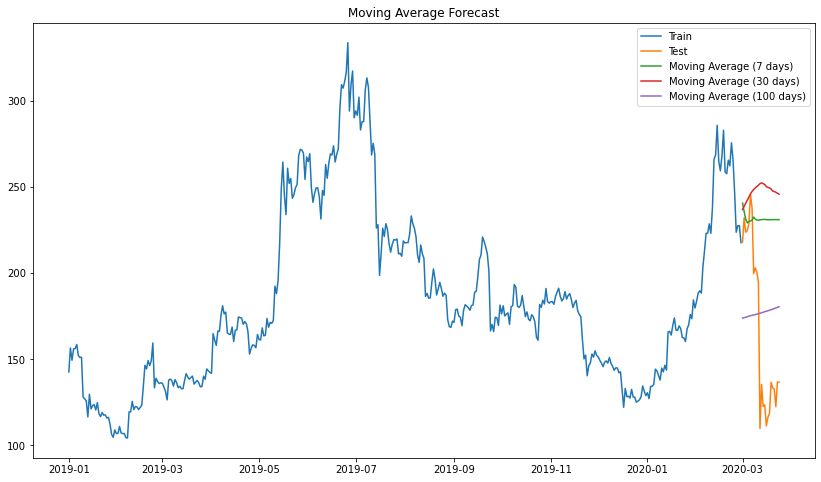

In [14]:
ma = test.copy()
ma['MovingAverage7'] = get_ma(train.Price[-7:].tolist(), 7, len(ma))
ma['MovingAverage30'] = get_ma(train.Price[-30:].tolist(), 30, len(ma))
ma['MovingAverage100'] = get_ma(train.Price[-100:].tolist(), 100, len(ma))
plt.figure(figsize=(14, 8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Val')
plt.plot(ma['MovingAverage7'], label='Moving Average (7 days)')
plt.plot(ma['MovingAverage30'], label='Moving Average (30 days)')
plt.plot(ma['MovingAverage100'], label='Moving Average (100 days)')
plt.legend(loc='best')
plt.title("Moving Average Forecast")
plt.show();

In [15]:
measure_accuracy(test.Price, ma.MovingAverage7)
measure_accuracy(test.Price, ma.MovingAverage30)
measure_accuracy(test.Price, ma.MovingAverage100)

{'rmse': 79.05377507223594,
 'mape': 0.28054936393403657,
 'mae': 64.86590491444935,
 'mpe': -0.2724001691541748,
 'me': -62.988085631384195,
 'corr': 0.22702206816822695}

{'rmse': 93.74174874058579,
 'mape': 0.31630166988463915,
 'mae': 78.77096161924223,
 'mpe': -0.31630166988463915,
 'me': -78.77096161924223,
 'corr': -0.6113999881693387}

{'rmse': 50.54171659948686,
 'mape': 0.27453641877087115,
 'mae': 48.59675675499917,
 'mpe': -0.04521768454604853,
 'me': -8.459796183709718,
 'corr': -0.8196626617589882}

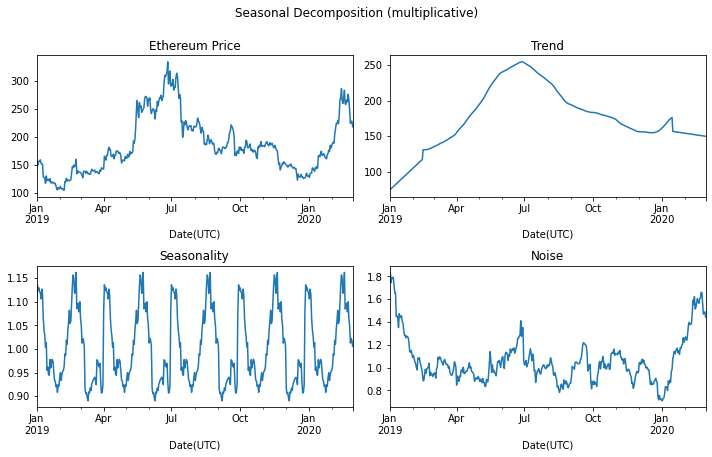

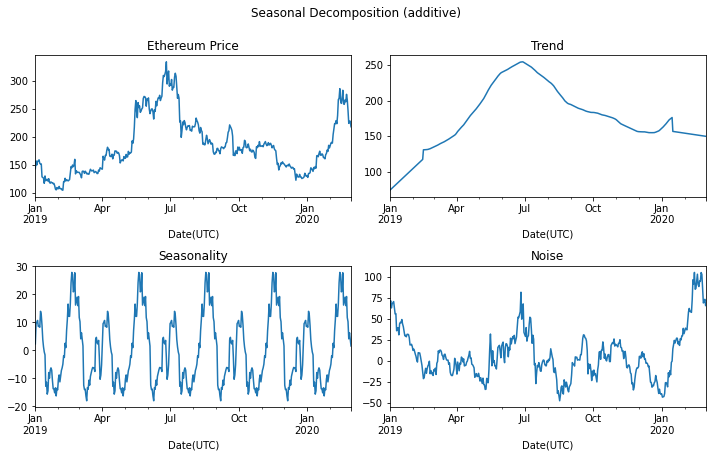

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(train.Price, model='multiplicative', period=90, extrapolate_trend='freq')
result_add = seasonal_decompose(train.Price, model='additive', period=90, extrapolate_trend='freq')

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
result_mul.observed.plot(ax=axes[0, 0], title='Ethereum Price')
result_mul.trend.plot(ax=axes[0, 1], title='Trend')
result_mul.seasonal.plot(ax=axes[1, 0], title='Seasonality')
result_mul.resid.plot(ax=axes[1, 1], title='Noise')
fig.tight_layout()
fig.suptitle('Seasonal Decomposition (multiplicative)', y=1.05)
plt.show();

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
result_add.observed.plot(ax=axes[0, 0], title='Ethereum Price')
result_add.trend.plot(ax=axes[0, 1], title='Trend')
result_add.seasonal.plot(ax=axes[1, 0], title='Seasonality')
result_add.resid.plot(ax=axes[1, 1], title='Noise')
fig.tight_layout()
fig.suptitle('Seasonal Decomposition (additive)', y=1.05)
plt.show();

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
c:\users\kevin\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.p

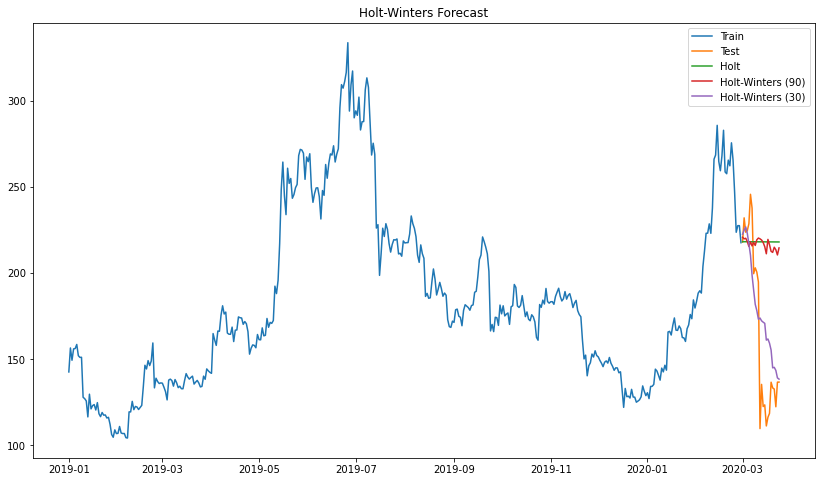

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
# warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

holt = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Price']), trend='mul').fit()
fit2 = ExponentialSmoothing(np.asarray(train['Price']), trend='add', seasonal='add', seasonal_periods=90).fit()
fit3 = ExponentialSmoothing(np.asarray(train['Price']), trend='add', seasonal='add', seasonal_periods=30).fit()
holt['Holt'] = fit1.forecast(len(test))
holt['HoltWinters90'] = fit2.forecast(len(test))
holt['HoltWinters30'] = fit3.forecast(len(test))
plt.figure(figsize=(14, 8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Val')
plt.plot(holt['Holt'], label='Holt')
plt.plot(holt['HoltWinters90'], label='Holt-Winters (90)')
plt.plot(holt['HoltWinters30'], label='Holt-Winters (30)')
plt.legend(loc='best')
plt.title('Holt-Winters Forecast')
plt.show();

In [22]:
measure_accuracy(test.Price, holt.Holt)
measure_accuracy(test.Price, holt.HoltWinters90)
measure_accuracy(test.Price, holt.HoltWinters30)

{'rmse': 69.16455560517191,
 'mape': 0.25931588880221673,
 'mae': 56.56967828232799,
 'mpe': -0.22746084657399654,
 'me': -49.6181694206683,
 'corr': 0.841778960656536}

{'rmse': 67.25727946433301,
 'mape': 0.2558636896680439,
 'mae': 55.20399762279923,
 'mpe': -0.22335809617007282,
 'me': -48.13511230510523,
 'corr': 0.4384715483322435}

{'rmse': 30.225390595602903,
 'mape': 0.14016508672670275,
 'mae': 24.116357147381468,
 'mpe': -0.06729721535583888,
 'me': -9.983193779668694,
 'corr': 0.8438655042858493}

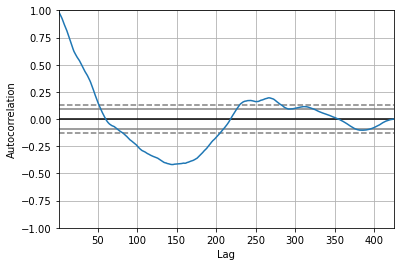

In [23]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train.Price.tolist())
plt.show();
# hence, seasonality unclear

In [25]:
from statsmodels.tsa.stattools import adfuller, kpss
from pmdarima.arima.utils import ndiffs

# ADF Test (reject => stationary)
res = adfuller(train.Price.values, autolag='AIC')
print('-- ADF Statistic:', res[0], '--')
print('p-value:', res[1])
for key, value in res[4].items():
    print('Critial Values:', key + ',', value)

# KPSS Test (reject => non-stationary)
res = kpss(train.Price.values, regression='c', nlags='auto')
print('-- KPSS Statistic:', res[0], '--')
print('p-value:', res[1])
for key, value in list(res[3].items())[::-1]:
    print('Critial Values:', key + ',', value)
    
# testing the degree of differencing needed
ndiffs(train.Price, test='adf')
ndiffs(train.Price, test='kpss')
ndiffs(train.Price, test='pp')

-- ADF Statistic: -1.8026405778010741 --
p-value: 0.3791515103401574
Critial Values: 1%, -3.445867291195605
Critial Values: 5%, -2.868380822100627
Critial Values: 10%, -2.5704139268867925
-- KPSS Statistic: 0.5097733512665537 --
p-value: 0.03946546142645188
Critial Values: 1%, 0.739
Critial Values: 2.5%, 0.574
Critial Values: 5%, 0.463
Critial Values: 10%, 0.347


1

1

1

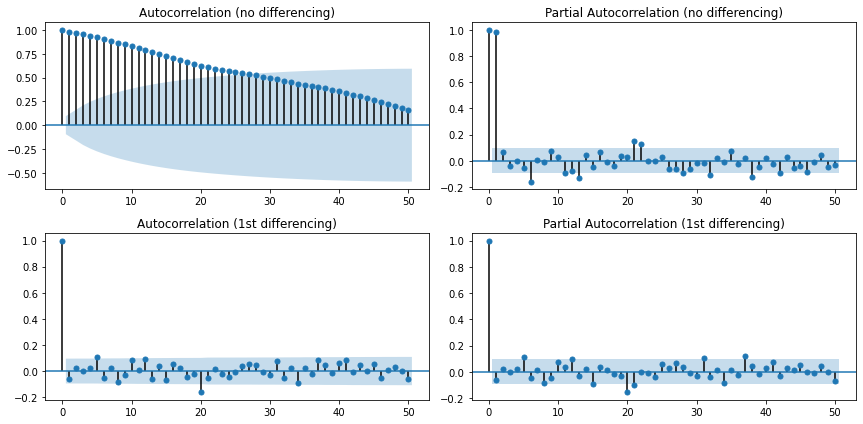

In [386]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plot_acf(train.Price.tolist(), lags=50, ax=axes[0, 0], title='Autocorrelation (no differencing)')
plot_pacf(train.Price.tolist(), lags=50, ax=axes[0, 1], title='Partial Autocorrelation (no differencing)')
plot_acf(train.Price.diff().dropna().tolist(), lags=50, ax=axes[1, 0], title='Autocorrelation (1st differencing)')
plot_pacf(train.Price.diff().dropna().tolist(), lags=50, ax=axes[1, 1], title='Partial Autocorrelation (1st differencing)')
fig.tight_layout()
plt.show();

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=3037.757, BIC=3053.956, Time=0.199 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=3035.534, BIC=3043.633, Time=0.023 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=3035.931, BIC=3048.080, Time=0.054 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=3036.006, BIC=3048.156, Time=0.078 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=3033.712, BIC=3037.761, Time=0.012 seconds
Total fit time: 0.377 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  425
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1515.856
Date:                Wed, 06 May 2020   AIC                           3033.712
Time:                        18:33:55   BIC                           3037.761
Sample:                             0   HQIC                          3

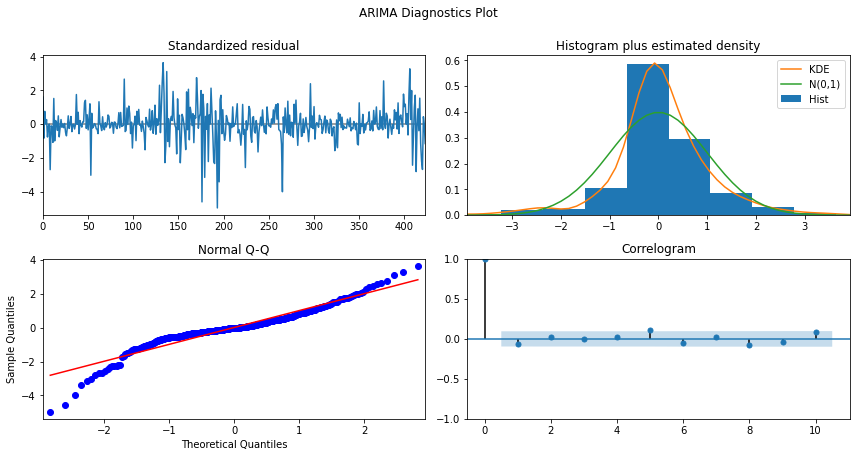

In [28]:
import pmdarima as pm

model = pm.auto_arima(train.Price, start_p=1, start_q=1,
                      test='adf',
                      max_p=10, max_q=10,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes[0, 0].axis('off'), axes[0, 1].axis('off'), axes[1, 0].axis('off'), axes[1, 1].axis('off')

model.plot_diagnostics(fig=fig)
fig.tight_layout()
fig.suptitle("ARIMA Diagnostics Plot", y=1.05)
plt.show();

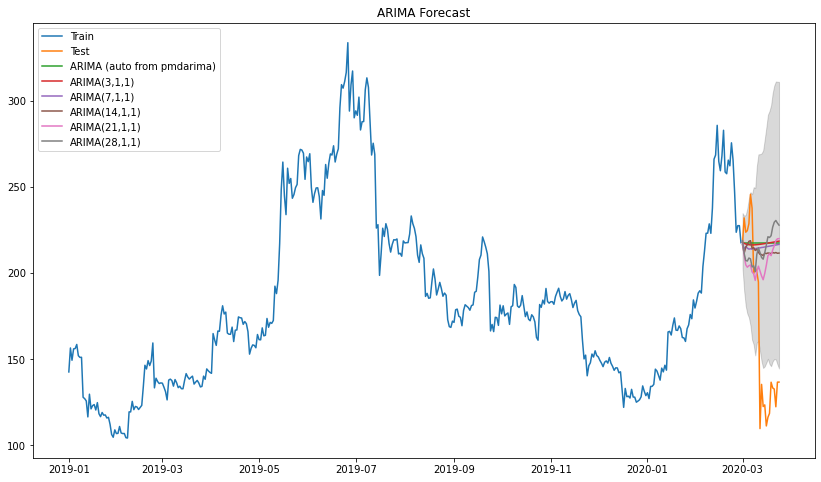

In [34]:
from statsmodels.tsa.arima_model import ARIMA

arima = test.copy()
forecast_n = len(test)
arima['ARIMAauto'] = model.predict(n_periods=forecast_n)
model_fit3 = ARIMA(train.Price, order=(3, 1, 1)).fit(disp=0)
arima['ARIMA(3,1,1)'], _, confint3 = model_fit3.forecast(forecast_n, alpha=0.05)
model_fit7 = ARIMA(train.Price, order=(7, 1, 1)).fit(disp=0)
arima['ARIMA(7,1,1)'], _, confint7 = model_fit7.forecast(forecast_n, alpha=0.05)
model_fit14 = ARIMA(train.Price, order=(14, 1, 1)).fit(disp=0)
arima['ARIMA(14,1,1)'], _, confint14 = model_fit14.forecast(forecast_n, alpha=0.05)
model_fit21 = ARIMA(train.Price, order=(21, 1, 1)).fit(disp=0)
arima['ARIMA(21,1,1)'], _, confint21 = model_fit21.forecast(forecast_n, alpha=0.05)
model_fit28 = ARIMA(train.Price, order=(28, 1, 1)).fit(disp=0)
arima['ARIMA(28,1,1)'], _, confint28 = model_fit28.forecast(forecast_n, alpha=0.05)

plt.figure(figsize=(14, 8))
plt.plot(train.Price, label='Train')
plt.plot(test.Price, label='Val')
plt.plot(arima['ARIMAauto'], label='ARIMA (auto from pmdarima)')
plt.plot(arima['ARIMA(3,1,1)'], label='ARIMA(3,1,1)')
plt.plot(arima['ARIMA(7,1,1)'], label='ARIMA(7,1,1)')
plt.plot(arima['ARIMA(14,1,1)'], label='ARIMA(14,1,1)')
plt.plot(arima['ARIMA(21,1,1)'], label='ARIMA(21,1,1)')
plt.plot(arima['ARIMA(28,1,1)'], label='ARIMA(28,1,1)')
plt.fill_between(test.index, confint28[:, 0], confint28[:, 1], color='k', alpha=.15)
plt.legend(loc='best')
plt.title("ARIMA Forecast")
plt.show();

In [180]:
measure_accuracy(test.Price, arima['ARIMAauto'])
measure_accuracy(test.Price, arima['ARIMA(3,1,1)'])
measure_accuracy(test.Price, arima['ARIMA(7,1,1)'])
measure_accuracy(test.Price, arima['ARIMA(14,1,1)'])
measure_accuracy(test.Price, arima['ARIMA(21,1,1)'])
measure_accuracy(test.Price, arima['ARIMA(28,1,1)'])

{'rmse': 68.8360043872391,
 'mape': 0.25898490138429503,
 'mae': 56.37583333333333,
 'mpe': -0.22566381844909963,
 'me': -49.1225,
 'corr': -1.7190576754444254e-16}

{'rmse': 68.78067899896372,
 'mape': 0.25929105273681247,
 'mae': 56.388455671930295,
 'mpe': -0.2235993464641678,
 'me': -48.656859200444586,
 'corr': -0.5657478669511967}

{'rmse': 67.44166481897638,
 'mape': 0.25813200747793225,
 'mae': 55.62214477324594,
 'mpe': -0.21607971530736922,
 'me': -46.611871696955895,
 'corr': -0.5945885936029138}

{'rmse': 64.23349778545156,
 'mape': 0.2492983934258679,
 'mae': 52.80459517198704,
 'mpe': -0.2107923421706701,
 'me': -44.500722895232435,
 'corr': 0.8051829381088371}

{'rmse': 63.43456574895235,
 'mape': 0.25273057581705255,
 'mae': 52.70160057617348,
 'mpe': -0.1825190145722052,
 'me': -38.3810569724745,
 'corr': -0.2353095103134466}

{'rmse': 71.21136752352253,
 'mape': 0.2689894245624327,
 'mae': 58.837122266411775,
 'mpe': -0.2093112216868056,
 'me': -46.4645026999926,
 'corr': -0.5979615255582272}